In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
%config Inline.Backend.figure_format = 'svg'
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [4]:
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}
url = 'https://www.booking.com/searchresults.en-gb.html?label=gen173nr-1DCAEoggI46AdIM1gEaMQBiAEBmAEJuAEXyAEM2AED6AEBiAIBqAIDuAKTsKKKBsACAdICJDRlZjA0OWM1LWVjZTItNDFhZC05Zjk5LTAwZDhhYzNhYjUwY9gCBOACAQ&sid=d38dfd9aaa47e6a77071849c624c7d32&sb=1&sb_lp=1&src=index&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Findex.en-gb.html%3Flabel%3Dgen173nr-1DCAEoggI46AdIM1gEaMQBiAEBmAEJuAEXyAEM2AED6AEBiAIBqAIDuAKTsKKKBsACAdICJDRlZjA0OWM1LWVjZTItNDFhZC05Zjk5LTAwZDhhYzNhYjUwY9gCBOACAQ%3Bsid%3Dd38dfd9aaa47e6a77071849c624c7d32%3Bsb_price_type%3Dtotal%26%3B&ss=Makkah%2C+Saudi+Arabia&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&dest_id=-3096949&dest_type=city&search_pageview_id=b0a9648a5c9e0048&search_selected=true'

In [2]:
df1 = pd.read_csv('C:/Users/Ashjan/Documents/Sdaya bootcamp/Projects/Regression/Data/Data_File.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
hotel_name      25 non-null object
hotel_rating    25 non-null float64
num_reviews     25 non-null object
review          25 non-null object
dist_centre     25 non-null object
dtypes: float64(1), object(4)
memory usage: 1.1+ KB


In [3]:
df2 = pd.read_csv('C:/Users/Ashjan/Documents/Sdaya bootcamp/Projects/Regression/Data/Data_File_3.csv')

In [4]:
df = df1.append([df2]) 
df.reset_index(drop=True)

,hotel_name,hotel_rating,num_reviews,review,dist_centre
0,Jabal Omar Hyatt Regency Makkah,8.4,"21,111 reviews",Very good,0.5 km from centre
1,Midan Hotel,8.7,"3,135 reviews",Fabulous,3 km from centre
2,M Hotel Makkah by Millennium,7.8,"5,439 reviews",Good,2.7 km from centre
3,Makarem Ajyad Makkah Hotel,8.1,"2,654 reviews",Very good,0.6 km from centre
4,Mövenpick Hotel & Residence Hajar Tower Makkah,8.1,"9,298 reviews",Very good,0.3 km from centre
5,Le Meridien Makkah,7.8,"5,206 reviews",Good,0.4 km from centre
6,Park Inn by Radisson Makkah Aziziyah,7.9,"6,154 reviews",Good,6 km from centre
7,Violet Al Shisha Hotel,8.4,"5,056 reviews",Very good,2.8 km from centre
8,Copthorne Makkah Al Naseem,8.2,"1,162 reviews",Very good,6.7 km from centre
9,Holiday Suites Al Aziziah,8.1,"10,410 reviews",Very good,3.6 km from centre


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 21
Data columns (total 5 columns):
hotel_name      47 non-null object
hotel_rating    47 non-null float64
num_reviews     47 non-null object
review          47 non-null object
dist_centre     47 non-null object
dtypes: float64(1), object(4)
memory usage: 2.2+ KB


In [6]:
df.head()

,hotel_name,hotel_rating,num_reviews,review,dist_centre
0,Jabal Omar Hyatt Regency Makkah,8.4,"21,111 reviews",Very good,0.5 km from centre
1,Midan Hotel,8.7,"3,135 reviews",Fabulous,3 km from centre
2,M Hotel Makkah by Millennium,7.8,"5,439 reviews",Good,2.7 km from centre
3,Makarem Ajyad Makkah Hotel,8.1,"2,654 reviews",Very good,0.6 km from centre
4,Mövenpick Hotel & Residence Hajar Tower Makkah,8.1,"9,298 reviews",Very good,0.3 km from centre


In [7]:
df.describe()

,hotel_rating
count,47.000000
mean,8.074468
std,0.492760
min,6.900000
25%,7.800000
50%,8.100000
75%,8.500000
max,8.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 21
Data columns (total 5 columns):
hotel_name      47 non-null object
hotel_rating    47 non-null float64
num_reviews     47 non-null object
review          47 non-null object
dist_centre     47 non-null object
dtypes: float64(1), object(4)
memory usage: 2.2+ KB


In [9]:
df['num_reviews'] = df['num_reviews'].str.replace(r'\D', '')
df

,hotel_name,hotel_rating,num_reviews,review,dist_centre
0,Jabal Omar Hyatt Regency Makkah,8.4,21111,Very good,0.5 km from centre
1,Midan Hotel,8.7,3135,Fabulous,3 km from centre
2,M Hotel Makkah by Millennium,7.8,5439,Good,2.7 km from centre
3,Makarem Ajyad Makkah Hotel,8.1,2654,Very good,0.6 km from centre
4,Mövenpick Hotel & Residence Hajar Tower Makkah,8.1,9298,Very good,0.3 km from centre
5,Le Meridien Makkah,7.8,5206,Good,0.4 km from centre
6,Park Inn by Radisson Makkah Aziziyah,7.9,6154,Good,6 km from centre
7,Violet Al Shisha Hotel,8.4,5056,Very good,2.8 km from centre
8,Copthorne Makkah Al Naseem,8.2,1162,Very good,6.7 km from centre
9,Holiday Suites Al Aziziah,8.1,10410,Very good,3.6 km from centre


In [10]:
df['dist_centre'] = df['dist_centre'].str.replace(r'\D', '')
df

,hotel_name,hotel_rating,num_reviews,review,dist_centre
0,Jabal Omar Hyatt Regency Makkah,8.4,21111,Very good,05
1,Midan Hotel,8.7,3135,Fabulous,3
2,M Hotel Makkah by Millennium,7.8,5439,Good,27
3,Makarem Ajyad Makkah Hotel,8.1,2654,Very good,06
4,Mövenpick Hotel & Residence Hajar Tower Makkah,8.1,9298,Very good,03
5,Le Meridien Makkah,7.8,5206,Good,04
6,Park Inn by Radisson Makkah Aziziyah,7.9,6154,Good,6
7,Violet Al Shisha Hotel,8.4,5056,Very good,28
8,Copthorne Makkah Al Naseem,8.2,1162,Very good,67
9,Holiday Suites Al Aziziah,8.1,10410,Very good,36


In [11]:
df.columns

Index(['hotel_name', 'hotel_rating', 'num_reviews', 'review', 'dist_centre'], dtype='object')

In [12]:
df3 = pd.DataFrame(df, columns = ['hotel_name', 'num_reviews']).reset_index(drop=True)
df3 = df3.sort_values('num_reviews', ascending=False).head(10)

In [13]:
df['hotel_rating']=df.hotel_rating.astype(float)

In [14]:
df['num_reviews']=df.num_reviews.astype(float)

In [15]:
df['dist_centre']=df.dist_centre.astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 21
Data columns (total 5 columns):
hotel_name      47 non-null object
hotel_rating    47 non-null float64
num_reviews     47 non-null float64
review          47 non-null object
dist_centre     47 non-null float64
dtypes: float64(3), object(2)
memory usage: 2.2+ KB


ValueError: cannot reindex from a duplicate axis

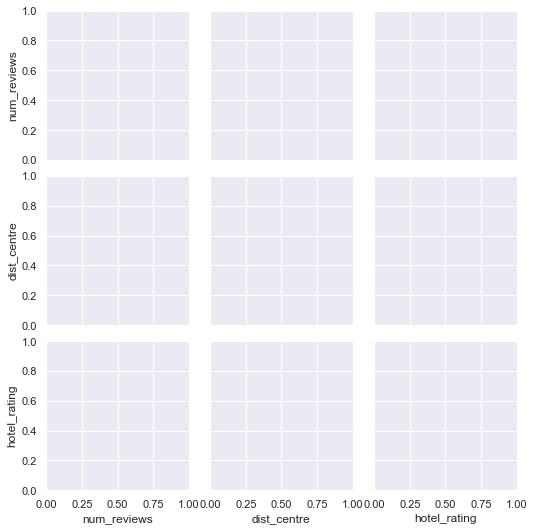

In [23]:
sns.pairplot(df[['num_reviews','dist_centre','hotel_rating']])

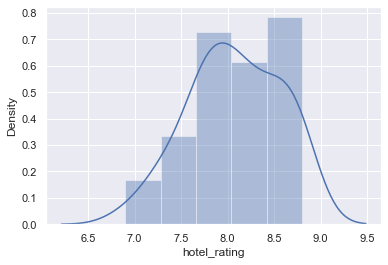

In [18]:
sns.distplot(df['hotel_rating'])

In [19]:
df.corr()

,hotel_rating,num_reviews,dist_centre
hotel_rating,1.000000,0.130168,-0.041939
num_reviews,0.130168,1.000000,-0.013685
dist_centre,-0.041939,-0.013685,1.000000


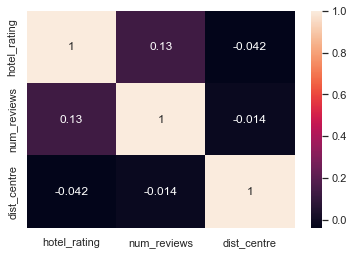

In [20]:
sns.heatmap(df.corr(), annot=True)

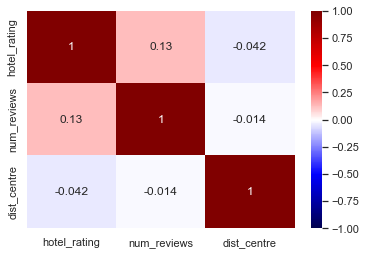

In [21]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

ValueError: cannot reindex from a duplicate axis

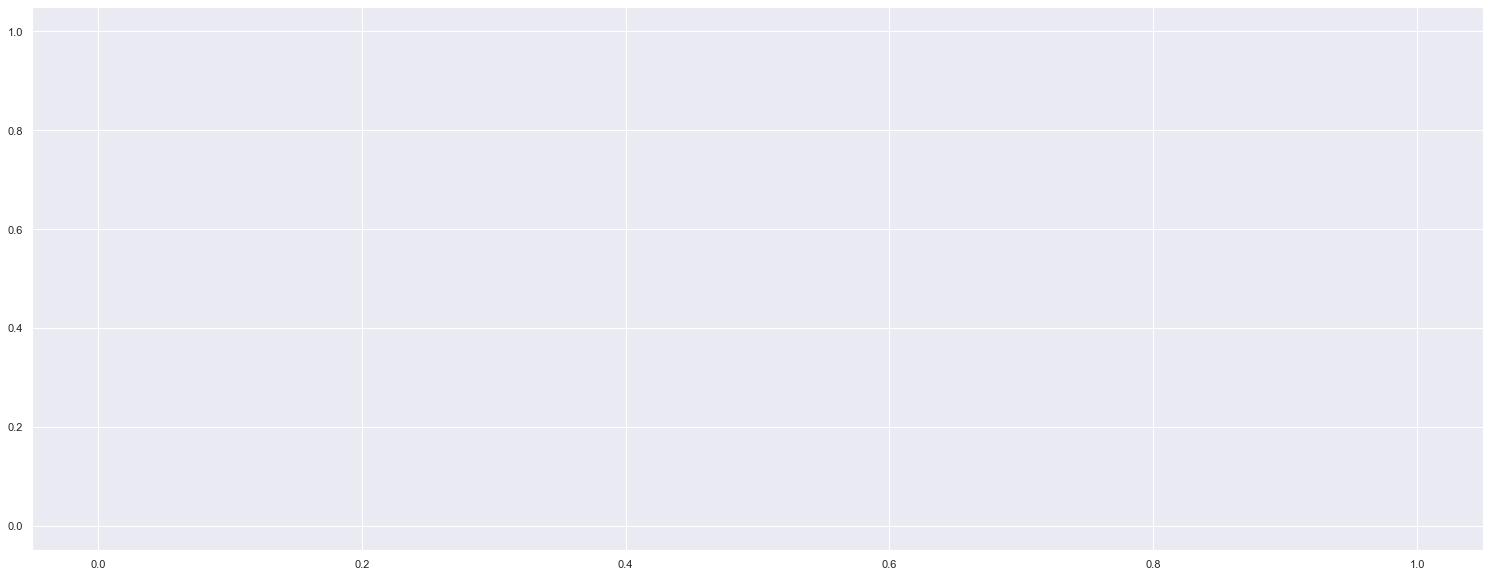

In [22]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
sns.lineplot(x="num_reviews",y="hotel_rating", data=df)

ValueError: cannot reindex from a duplicate axis

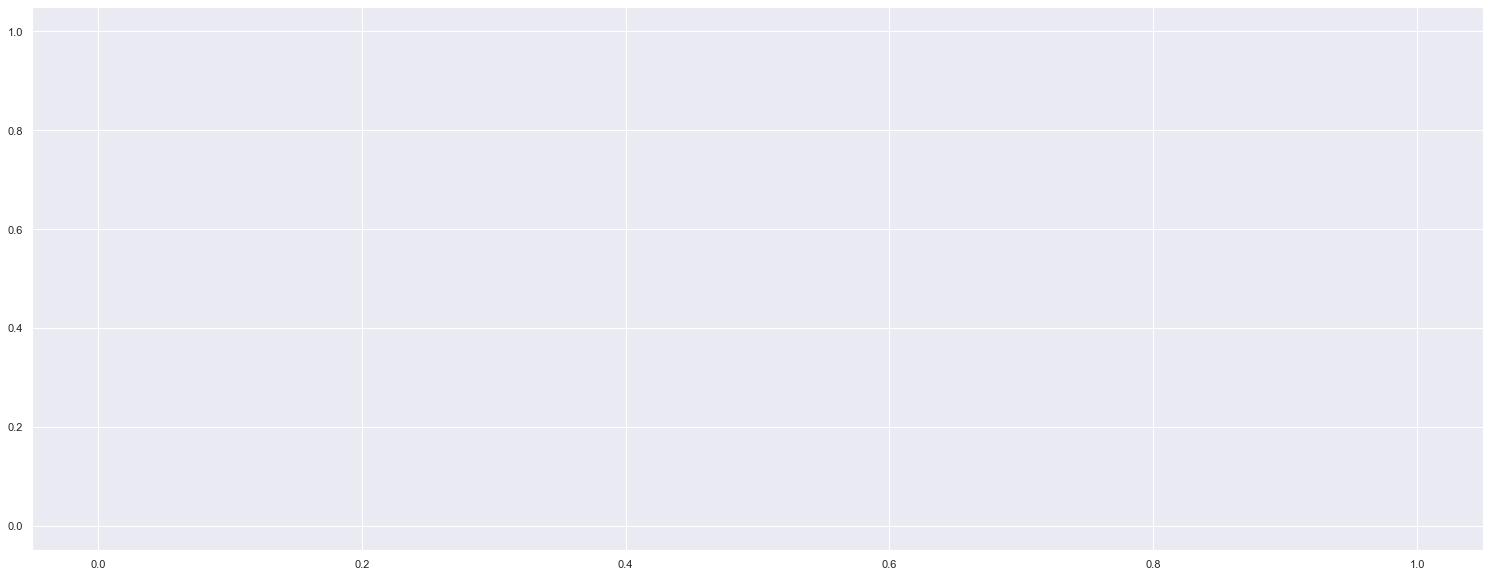

In [24]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
sns.lineplot(x="dist_centre",y="hotel_rating", data=df)

In [25]:
df.drop("hotel_name", axis = 1, inplace =True)
df.head()

,hotel_rating,num_reviews,review,dist_centre
0,8.4,21111.0,Very good,5.0
1,8.7,3135.0,Fabulous,3.0
2,7.8,5439.0,Good,27.0
3,8.1,2654.0,Very good,6.0
4,8.1,9298.0,Very good,3.0


In [26]:
df_review = pd.get_dummies(df)
df_review.head()

,hotel_rating,num_reviews,dist_centre,review_Fabulous,review_Good,review_Review score,review_Very good
0,8.4,21111.0,5.0,0,0,0,1
1,8.7,3135.0,3.0,1,0,0,0
2,7.8,5439.0,27.0,0,1,0,0
3,8.1,2654.0,6.0,0,0,0,1
4,8.1,9298.0,3.0,0,0,0,1


In [27]:
df.columns

Index(['hotel_rating', 'num_reviews', 'review', 'dist_centre'], dtype='object')

In [28]:
X = df[['num_reviews','dist_centre']]

In [29]:
y = df['hotel_rating']

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size= 0.20, random_state=3)

In [32]:
#BASELINE
lm = LinearRegression()
lm.fit(X_train, y_train)
dir(lm)
list(zip(X.columns, lm.coef_))

[('num_reviews', 1.7625244455360812e-05),
 ('dist_centre', -0.00029907448549339264)]

In [33]:
y_prediction = lm.predict(x_test)
y_prediction

NameError: name 'x_test' is not defined

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=3)

In [35]:
import patsy
import statsmodels.api as sm

In [36]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('y ~ X + X', data=df, return_type="dataframe") # "regression formula"

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.4160
Date:                Mon, 27 Sep 2021   Prob (F-statistic):              0.662
Time:                        14:21:47   Log-Likelihood:                -32.481
No. Observations:                  47   AIC:                             70.96
Df Residuals:                      44   BIC:                             76.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0237      0.119     67.261      0.000       7.783       8.264
X[0]        1.306e-05    1.5e-05      0.868      0.390   -1.73e-05    4.34e-05
X[1]          -0.0006      0.002     -0.269      0.789      -0.005       0.004
==============================================================================
Omnibus:                        1.364   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                1.273
Skew:                          -0.267   Prob(JB):                        0.529
Kurtosis:                       2.396   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

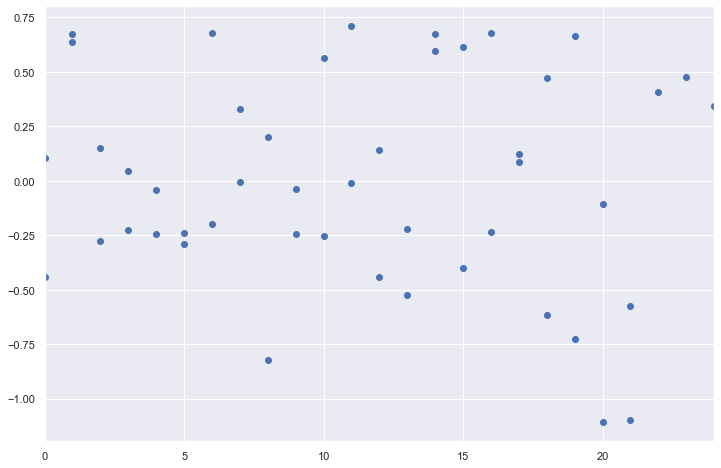

In [37]:
# Use statsmodels to plot the residuals
fit.resid.plot(style='o', figsize=(12,8)); ####

In [38]:
lm.score(X_train, y_train)

0.011668983742017414

In [39]:
print(lm.intercept_)

7.940337657852138


In [40]:
lm.coef_

array([ 1.76252445e-05, -2.99074485e-04])

In [41]:
lm.score(X_val, y_val)

0.07888043246480647

In [43]:
X_train.columns

Index(['num_reviews', 'dist_centre'], dtype='object')

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
from sklearn.preprocessing import StandardScaler
import patsy
import statsmodels.api as sm

In [46]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [47]:
X_train_scaled = std.transform(X_train.values)

In [48]:
#EXPERIMENT 1
lm_1 = LinearRegression()
lm_1.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
lm_1.score(X_train_scaled, y_train)

0.07649172529247872

In [50]:
std.fit(X_val.values)
X_val_scaled = std.transform(X_val.values)

In [51]:
lm_1.score(X_val_scaled, y_val)

0.017851302873299613

In [181]:
#EXPERIMENT 2
# define new col in df_review

X = df_review.drop('hotel_rating', axis = 1)
         
y = df_review['hotel_rating']

df_review

,hotel_rating,num_reviews,dist_centre,review_Fabulous,review_Good,review_Review score,review_Very good,num_review_2
0,8.4,21111.0,5.0,0,0,0,1,445674321.0
1,8.7,3135.0,3.0,1,0,0,0,9828225.0
2,7.8,5439.0,27.0,0,1,0,0,29582721.0
3,8.1,2654.0,6.0,0,0,0,1,7043716.0
4,8.1,9298.0,3.0,0,0,0,1,86452804.0
5,7.8,5206.0,4.0,0,1,0,0,27102436.0
6,7.9,6154.0,6.0,0,1,0,0,37871716.0
7,8.4,5056.0,28.0,0,0,0,1,25563136.0
8,8.2,1162.0,67.0,0,0,0,1,1350244.0
9,8.1,10410.0,36.0,0,0,0,1,108368100.0


In [178]:
df_review['num_review_2'] = df_review['num_reviews']**2

In [180]:
df_review

,hotel_rating,num_reviews,dist_centre,review_Fabulous,review_Good,review_Review score,review_Very good,num_review_2
0,8.4,21111.0,5.0,0,0,0,1,445674321.0
1,8.7,3135.0,3.0,1,0,0,0,9828225.0
2,7.8,5439.0,27.0,0,1,0,0,29582721.0
3,8.1,2654.0,6.0,0,0,0,1,7043716.0
4,8.1,9298.0,3.0,0,0,0,1,86452804.0
5,7.8,5206.0,4.0,0,1,0,0,27102436.0
6,7.9,6154.0,6.0,0,1,0,0,37871716.0
7,8.4,5056.0,28.0,0,0,0,1,25563136.0
8,8.2,1162.0,67.0,0,0,0,1,1350244.0
9,8.1,10410.0,36.0,0,0,0,1,108368100.0


In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=3)

In [114]:

%pylab inline
#% config InlineBackend.figure_format = 'svg'

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score


Populating the interactive namespace from numpy and matplotlib


In [56]:
lm_2 = LinearRegression()
lm_2.fit(X_train, y_train)

LinearRegression()

In [57]:
lm_2.score(X_train, y_train)

0.08452531092679216

In [129]:
lm_2.score(X_val, y_val)

0.03068264395718212

In [132]:
#Separate our features from our target

X = df.loc[:,['num_reviews','dist_centre']]

y = df['hotel_rating']

# create overall quality squared term, which we expect to 
# help based on the relationship we see in the pair plot 
X['nm2'] = X['num_reviews'] ** 2

In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 21
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_reviews  47 non-null     float64
 1   dist_centre  47 non-null     float64
 2   nm2          47 non-null     float64
dtypes: float64(3)
memory usage: 1.5 KB


In [137]:

#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [138]:
X_train.columns

Index(['num_reviews', 'dist_centre', 'nm2'], dtype='object')

In [140]:
X_val.shape

(10, 3)

In [141]:
X_test.shape

(10, 3)

In [143]:
selected_columns = ['num_reviews','dist_centre','nm2']

In [144]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 22 to 8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_reviews  27 non-null     float64
 1   dist_centre  27 non-null     float64
 2   nm2          27 non-null     float64
dtypes: float64(3)
memory usage: 864.0 bytes


In [171]:
lasso_model = Lasso(alpha = 1000000) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train.loc[:,selected_columns], y_train)

Lasso(alpha=1000000)

In [172]:
list(zip(selected_columns, lasso_model.coef_))

[('num_reviews', 0.0), ('dist_centre', -0.0), ('nm2', -5.717044220336092e-10)]

In [177]:

lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_ridge.coef_))

[('num_reviews', 6.600154507894322e-09),
 ('dist_centre', -4.729792628833063e-11),
 ('nm2', -6.317021390030989e-10)]

In [59]:
## Predctions

predections = lm.predict(X_test)

In [60]:
predections

array([8.03264283, 8.05979343, 7.90305389, 7.93652757, 7.75837082,
       8.03831429, 8.00567915, 8.14102322, 8.1158135 , 7.99651586])

In [61]:
y_test

10    8.6
19    8.7
18    8.5
23    8.5
2     8.2
12    7.6
9     8.1
16    8.8
6     7.9
0     7.6
Name: hotel_rating, dtype: float64

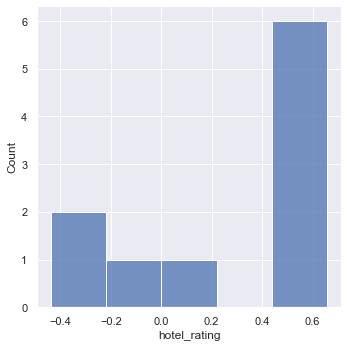

In [222]:
## histogram for Error (Residuals)

sns.displot((y_test-predections))

In [64]:
## Metrics to Evaluate the Regression Model

from sklearn import metrics

In [65]:
metrics.mean_absolute_error(y_test, predections)

0.4613552734036312

In [66]:
metrics.mean_squared_error(y_test, predections)

0.24397073054638052

In [67]:
np.sqrt(metrics.mean_squared_error(y_test, predections))

0.49393393338216857

In [75]:
import scipy.stats as stats

In [77]:

# Generate fake data
s = 500
x = np.random.uniform(low=-5, high=5, size=s)

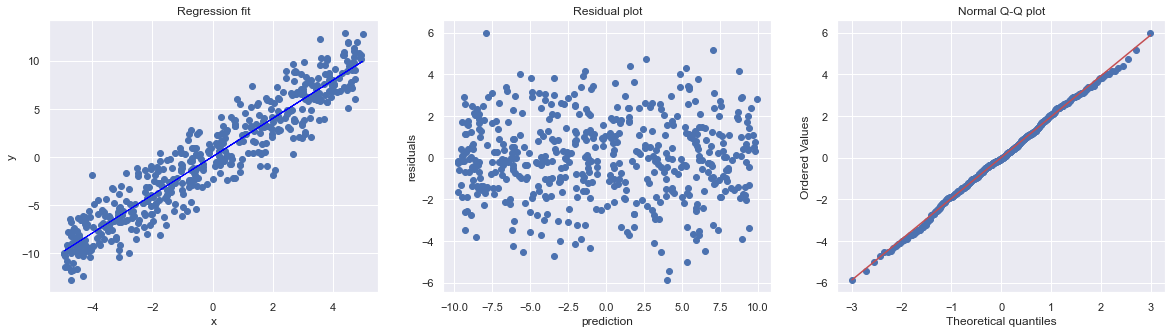

In [234]:

epsilon = 2*np.random.randn(s)
beta = 2
y = beta*x + epsilon

diagnostic_plot(x.reshape(s,1), y) # we reshape x to turn it into a tall column

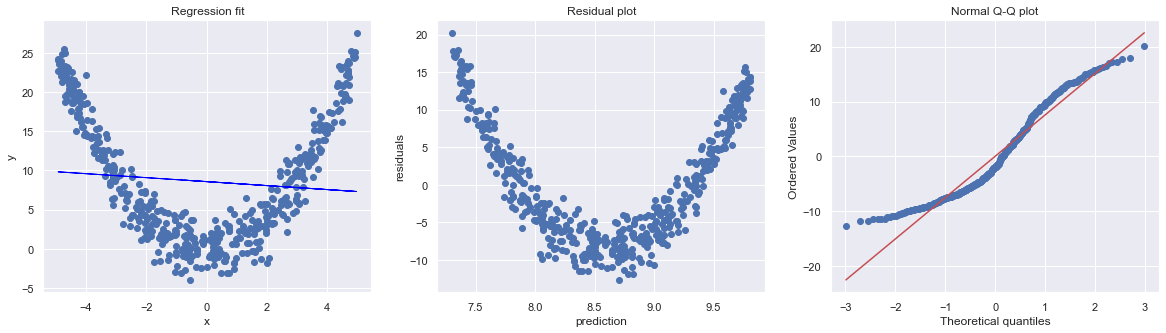

In [235]:

beta1 = 1
y = beta1*(x**2) + epsilon

diagnostic_plot(x.reshape(s,1), y)

In [194]:
x_test= df[['hotel_rating']]

In [229]:
y_predicted=lm.predict(X_test)
df= pd.DataFrame({'Actual': y_test,'predicted':y_predicted})

In [200]:
import seaborn as sns

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 21
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotel_rating  47 non-null     float64
 1   num_reviews   47 non-null     float64
 2   review        47 non-null     object 
 3   dist_centre   47 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.9+ KB


<AxesSubplot:xlabel='num_reviews', ylabel='hotel_rating'>

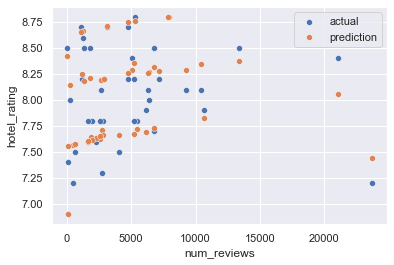

In [221]:
sns.scatterplot(df.num_reviews, df.hotel_rating, label='actual')
sns.scatterplot(df.num_reviews, df.predictions, label='prediction')

<AxesSubplot:xlabel='dist_centre', ylabel='hotel_rating'>

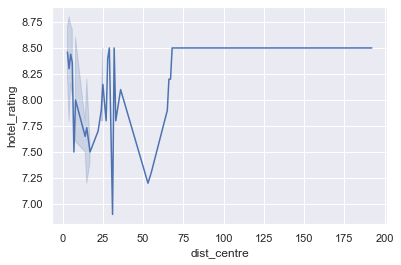

In [204]:
sns.lineplot(x='dist_centre', y='hotel_rating', data= df )

In [218]:
model= LinearRegression()
model.fit(X,y)
prediction= model.predict(X)
df['predictions']= prediction


In [219]:
df['predictions']

0     8.057079
1     8.709700
2     7.720818
3     8.193131
4     8.287289
5     7.677364
6     7.696014
7     8.285885
8     8.252489
9     8.344212
10    7.624083
11    8.757638
12    7.595444
13    7.823281
14    8.793099
15    7.731490
16    8.794212
17    8.278995
18    8.211476
19    7.708090
20    8.267773
21    7.659983
22    8.313978
23    8.185004
24    8.377000
0     7.631146
1     8.793099
2     8.353752
3     7.646946
4     7.658898
5     7.617624
6     8.794158
7     8.262619
8     7.570504
9     7.651685
10    8.661946
11    8.146896
12    8.197498
13    7.573522
14    8.427118
15    8.746174
16    7.607069
17    8.257807
18    7.559147
19    8.649975
20    6.900000
21    7.446892
Name: predictions, dtype: float64